In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
sea_df = pd.read_csv('epa-sea-level.csv')
sea_df.sample(10)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
107,1987,5.795276,5.551181,6.039370,NaN
99,1979,5.362205,5.098425,5.625984,NaN
106,1986,5.771654,5.523622,6.019685,NaN
76,1956,3.763780,3.488189,4.039370,NaN
13,1893,0.685039,-0.114173,1.484252,NaN
113,1993,6.291339,6.027559,6.555118,6.297493
42,1922,1.952756,1.433071,2.472441,NaN
122,2002,7.381890,7.110236,7.653543,7.319698
18,1898,1.043307,0.267717,1.818898,NaN
54,1934,2.228346,1.759843,2.696850,NaN


In [3]:
sea_df = pd.read_csv('epa-sea-level.csv')
sea_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


In [4]:
sea_df.columns.tolist()

['Year',
 'CSIRO Adjusted Sea Level',
 'Lower Error Bound',
 'Upper Error Bound',
 'NOAA Adjusted Sea Level']

In [5]:
new_sea_df = sea_df.rename(columns={'CSIRO Adjusted Sea Level': 'CSIRO', 'Lower Error Bound': 'Lower', 'Upper Error Bound': 'Upper', 'NOAA Adjusted Sea Level': 'NOAA'})
new_sea_df.head()

,Year,CSIRO,Lower,Upper,NOAA
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Text(0, 0.5, 'Sea Level')

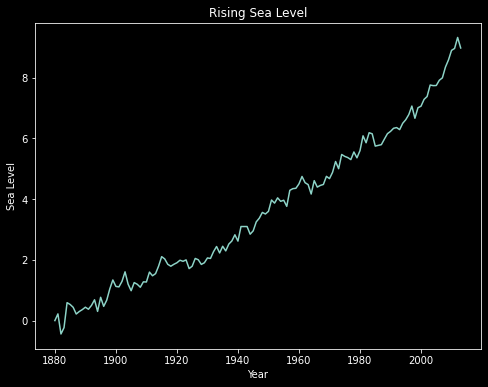

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(new_sea_df.Year, new_sea_df.CSIRO)
plt.title("Rising Sea Level", fontsize=12)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Sea Level", fontsize=10)

Text(0, 0.5, 'Sea Level')

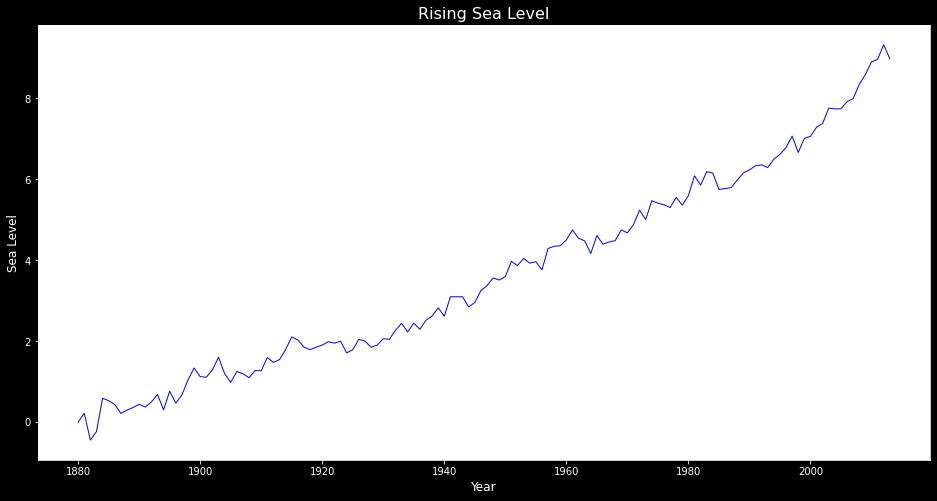

In [54]:
fig, ax = plt.subplots(figsize = (16,8))
ax.plot(new_sea_df['Year'], new_sea_df['CSIRO'], color='blue', linewidth=1)
ax.set_facecolor('white')
ax.set_title("Rising Sea Level", fontsize=16)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Sea Level", fontsize=12)


In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Rising Sea Level')

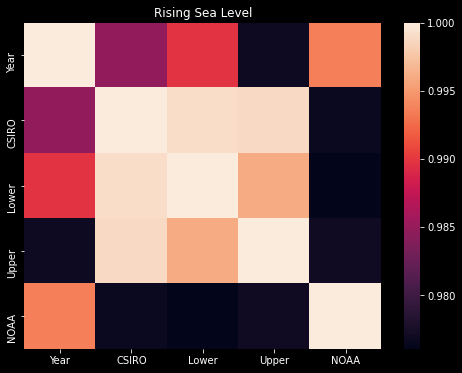

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_sea_df.corr())
plt.title("Rising Sea Level", fontsize=12)

In [10]:
new_sea_df.NOAA.unique()

array([       nan, 6.29749305, 6.31093355, 6.45256866, 6.62763131,
       6.73392037, 6.86580607, 6.84868977, 6.92058201, 7.08746001,
       7.31969752, 7.48835272, 7.50793284, 7.64456314, 7.69742001,
       7.70214715, 7.90736541, 8.04635409, 8.12297257, 8.053065  ,
       8.45705763, 8.54664823])

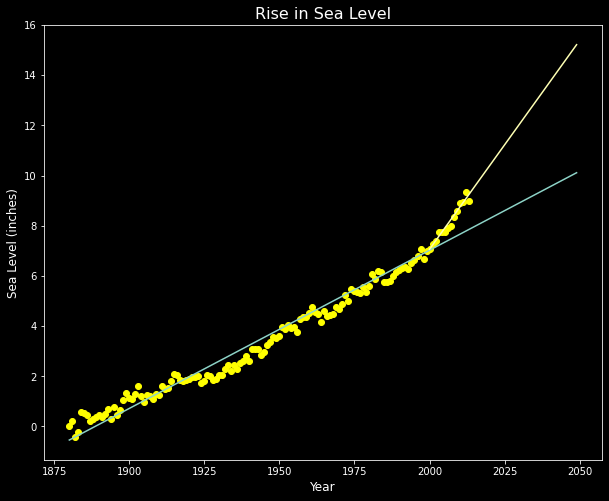

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(new_sea_df.Year, new_sea_df.CSIRO, color='yellow')

line_1 = linregress(new_sea_df['Year'], new_sea_df['CSIRO'])
x_1 = np.arange(new_sea_df['Year'].min(),2050, 1)
y_1 = x_1 * line_1.slope + line_1.intercept
plt.plot(x_1, y_1)

new_sea_df_2000 = new_sea_df[new_sea_df['Year'] >= 2000]

line_2 = linregress(new_sea_df_2000['Year'], new_sea_df_2000['CSIRO'])
x_2 = np.arange(2000, 2050,1)
y_2 = x_2 * line_2.slope + line_2.intercept
plt.plot(x_2,y_2)

plt.title('Rise in Sea Level', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea Level (inches)', fontsize=12)

plt.savefig('rise in Sea Level.png')


In [40]:
lr = linregress(new_sea_df['Year'], new_sea_df['CSIRO'])
lr

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.9847571311825853, pvalue=3.788696979107662e-102, stderr=0.0009692118713287059, intercept_stderr=1.8869433812425047)